In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

from sklearn.ensemble import RandomForestClassifier

In [ ]:
Telocom_data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(Telocom_data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
Telocom_data.shape

(7043, 21)

In [ ]:
Telocom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Telocom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
Telocom_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:


# Handle 'TotalCharges' column: convert to numeric and fill missing values
Telocom_data['TotalCharges'] = pd.to_numeric(Telocom_data['TotalCharges'], errors='coerce')
Telocom_data['TotalCharges'] = Telocom_data['TotalCharges'].fillna(Telocom_data['TotalCharges'].mean())

# Drop 'customerID' column
Telocom_data.drop('customerID', axis=1, inplace=True)

# Convert 'Churn' column from 'Yes'/'No' to 1/0
# This assumes the 'Churn' column now contains 'Yes' or 'No' strings
Telocom_data['Churn'] = Telocom_data['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
print(Telocom_data.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

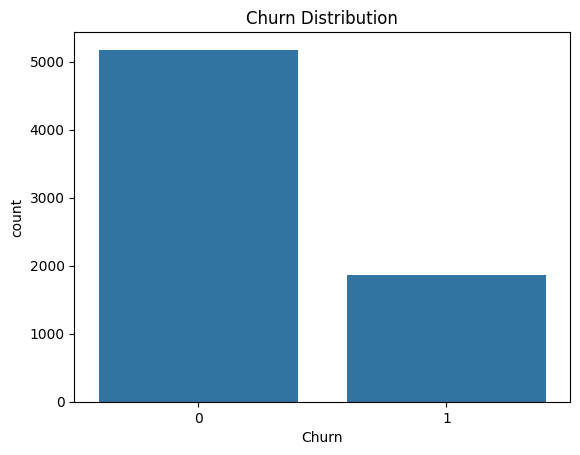

In [ ]:
sns.countplot(x='Churn',data=Telocom_data)
plt.title('Churn Distribution')
plt.show()

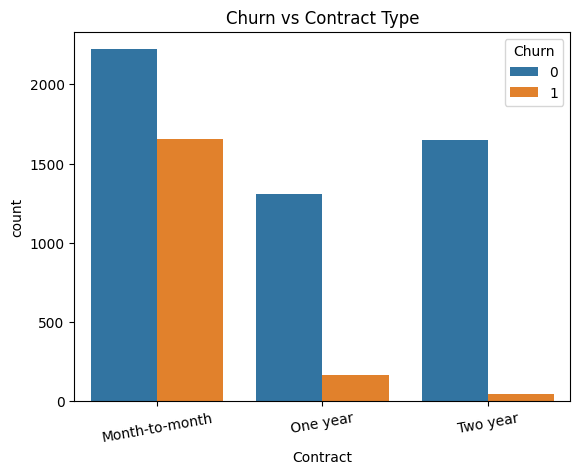

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=Telocom_data)
plt.xticks(rotation=10)
plt.title('Churn vs Contract Type')
plt.show()

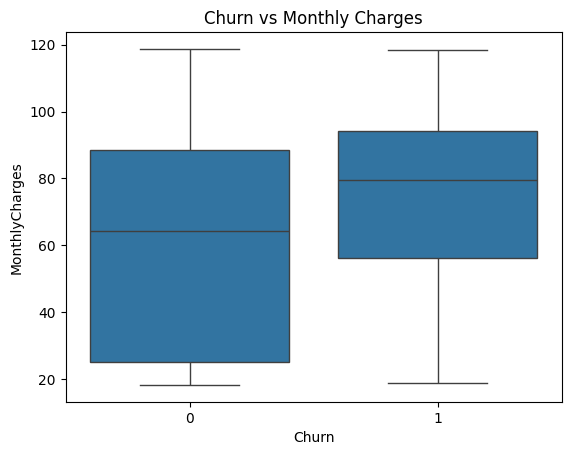

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=Telocom_data)
plt.title('Churn vs Monthly Charges')
plt.show()

In [ ]:
Telocom_data = pd.get_dummies(Telocom_data, drop_first=True)


In [ ]:
X = Telocom_data.drop('Churn', axis=1)
y = Telocom_data['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.63      0.54      0.58       375

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1034
           1       0.59      0.48      0.53       375

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [ ]:
print("Logistic Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Accuracy: 0.7934705464868701
Random Forest Accuracy: 0.7743080198722498


In [ ]:
importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
3,TotalCharges,0.194813
1,tenure,0.173053
2,MonthlyCharges,0.168601
10,InternetService_Fiber optic,0.040969
28,PaymentMethod_Electronic check,0.037610
4,gender_Male,0.028586
13,OnlineSecurity_Yes,0.028116
25,Contract_Two year,0.026938
26,PaperlessBilling_Yes,0.024297
5,Partner_Yes,0.023079
